In [2]:
import pandas as pd
import numpy as np
import json as js
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
fnames = ["SingleModel_training_results_5epochs_36batchsize_0_01lr_SGD_optim_0_1_momentum_2023-01-12.json",
          "SingleModel_training_results_5epochs_36batchsize_0_01lr_SGD_optim_0_3_momentum_2023-01-12.json",
          "SingleModel_training_results_5epochs_36batchsize_0_01lr_SGD_optim_0_5_momentum_2023-01-12.json",
          "SingleModel_training_results_5epochs_36batchsize_0_01lr_SGD_optim_0_9_momentum_2023-01-12.json",
          "SingleModel_training_results_5epochs_36batchsize_0_01lr_Adam_optim_2023-01-12.json"
         ]
p01 = pd.read_json(fnames[0],orient='column')
p03 = pd.read_json(fnames[1],orient='column')
p05 = pd.read_json(fnames[2],orient='column')
p09 = pd.read_json(fnames[3],orient='column')
pad = pd.read_json(fnames[4],orient='column')

In [27]:
p05

,training,validating
micro/precision,"[0.856224007799907, 0.848637386546066, 0.85398...","[0.85226284221987, 0.8326296989806291, 0.86736..."
micro/recall,"[0.571331519580997, 0.6457606215502111, 0.6577...","[0.639032041740722, 0.6735826764732531, 0.6687..."
micro/f1,"[0.6825149221061021, 0.7320772948500961, 0.741...","[0.729207434430833, 0.7437962141538711, 0.7541..."
macro/precision,"[0.17186095887865901, 0.264958081517467, 0.279...","[0.23973387142808703, 0.24167589583277801, 0.3..."
macro/recall,"[0.142793113246934, 0.203551336525706, 0.21662...","[0.18364319986158, 0.197609638507414, 0.239911..."
macro/f1,"[0.144599507043655, 0.215313742969228, 0.22928...","[0.19361851137410502, 0.204136813534286, 0.256..."
samples/precision,"[0.8465205753905151, 0.8556200074565891, 0.861...","[0.859444029231024, 0.8403198922817751, 0.8766..."
samples/recall,"[0.6273676653736621, 0.694604780942861, 0.7066...","[0.683566001138871, 0.6989014639238851, 0.7253..."
samples/f1,"[0.68991859312324, 0.7396697681055501, 0.75027...","[0.7335018991969661, 0.740082830030513, 0.7677..."
hamming_loss,"[0.090442523836121, 0.079185897247454, 0.07669...","[0.07975761306017101, 0.07799906210615701, 0.0..."


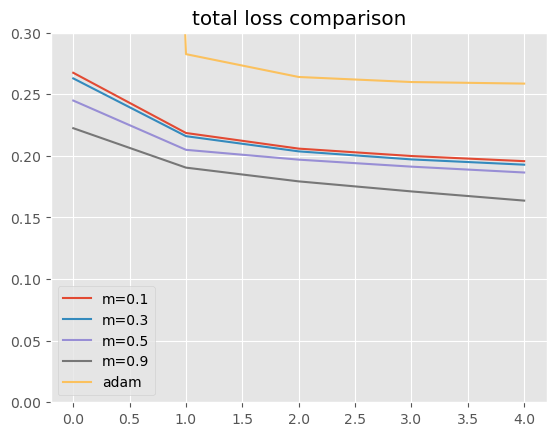

In [35]:
plt.figure()
plt.plot(p01['training']['total_loss'], label= 'm=0.1')
plt.plot(p03['training']['total_loss'], label = 'm=0.3')
plt.plot(p05['training']['total_loss'], label = 'm=0.5')
plt.plot(p09['training']['total_loss'], label = 'm=0.9')
plt.plot(pad['training']['total_loss'], label = 'adam')
plt.title('total loss comparison')
plt.ylim([0,0.3])
plt.legend()
plt.show()

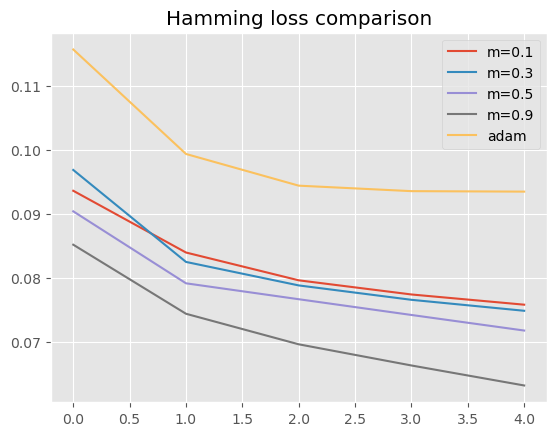

In [39]:
plt.figure()
plt.plot(p01['training']['hamming_loss'], label= 'm=0.1')
plt.plot(p03['training']['hamming_loss'], label = 'm=0.3')
plt.plot(p05['training']['hamming_loss'], label = 'm=0.5')
plt.plot(p09['training']['hamming_loss'], label = 'm=0.9')
plt.plot(pad['training']['hamming_loss'], label = 'adam')
plt.title('Hamming loss comparison')
plt.legend()
plt.show()

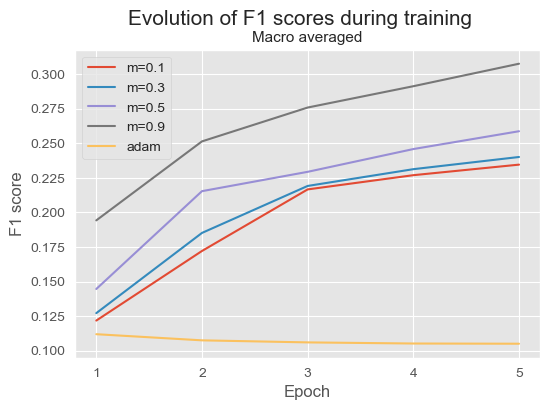

In [21]:
plt.figure(figsize=(6,4))
plt.plot(range(1,6), p01['training']['macro/f1'], label= 'm=0.1')
plt.plot(range(1,6), p03['training']['macro/f1'], label = 'm=0.3')
plt.plot(range(1,6), p05['training']['macro/f1'], label = 'm=0.5')
plt.plot(range(1,6), p09['training']['macro/f1'], label = 'm=0.9')
plt.plot(range(1,6), pad['training']['macro/f1'], label = 'adam')
plt.title("Macro averaged", fontsize=11)
plt.suptitle("Evolution of F1 scores during training", fontsize=15)
plt.xticks(range(1,6))
plt.xlabel("Epoch")
plt.ylabel("F1 score")
plt.legend()
plt.show()